### 1. Imports

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import yfinance as yf
import ta

### 2. Téléchargement des données

In [2]:
# Paramètres
TICKER = '^GSPC'
INTERVAL = '2m'
PERIOD = '1mo'

In [3]:
gspc_data = yf.download(
    TICKER,
    interval=INTERVAL,
    period=PERIOD,
    progress=False
)

In [4]:
print("Aperçu des données brutes :")
display(gspc_data.head())

Aperçu des données brutes :


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Datetime,,,,,
2024-12-31 14:30:00+00:00,5922.450195,5924.959961,5918.939941,5919.740234,7648550
2024-12-31 14:32:00+00:00,5928.020020,5928.790039,5920.220215,5922.450195,11120484
2024-12-31 14:34:00+00:00,5925.160156,5929.379883,5924.540039,5928.000000,10852002
2024-12-31 14:36:00+00:00,5920.890137,5926.259766,5920.770020,5925.149902,10299495
2024-12-31 14:38:00+00:00,5914.250000,5920.899902,5914.250000,5920.899902,10637818


In [5]:
print("\nForme de gspc_data :", gspc_data.shape)
print("Type de gspc_data['Close'] :", type(gspc_data['Close']))


Forme de gspc_data : (3899, 5)
Type de gspc_data['Close'] : <class 'pandas.core.frame.DataFrame'>


### 3. Feature Engineering (indicateurs techniques)

In [6]:
feature = pd.DataFrame(index = gspc_data.index)

# Convertir en Série (index, )
close_prices = gspc_data['Close'].squeeze()
high_prices = gspc_data['High'].squeeze()
low_prices = gspc_data['Low'].squeeze()
volume_prices = gspc_data['Volume'].squeeze()

# Calcul des métriques
feature['SMA'] = ta.trend.sma_indicator(close_prices, window=14)
feature['MACD'] = ta.trend.macd(close_prices)
feature['RSI'] = ta.momentum.rsi(close_prices)
feature['Close'] = close_prices
feature['Bollinger_Upper'], feature['Bollinger_Lower'] = ta.volatility.bollinger_hband(close_prices), ta.volatility.bollinger_lband(close_prices)
feature['ATR'] = ta.volatility.average_true_range(high_prices, low_prices,close_prices)
feature['ADX'] = ta.trend.adx(high_prices, low_prices, close_prices)
feature['OBV'] = ta.volume.on_balance_volume(close_prices, volume_prices)

# Copie dans gspc_data
gspc_data['SMA'] = feature['SMA']
gspc_data['MACD'] = feature['MACD']
gspc_data['RSI'] = feature['RSI']
gspc_data['Bollinger_Upper'] = feature['Bollinger_Upper']
gspc_data['Bollinger_Lower'] = feature['Bollinger_Lower']
gspc_data['ATR'] = feature['ATR']
gspc_data['ADX'] = feature['ADX']
gspc_data['OBV'] = feature['OBV']

In [7]:
feature

,SMA,MACD,RSI,Close,Bollinger_Upper,Bollinger_Lower,ATR,ADX,OBV
Datetime,,,,,,,,,
2024-12-31 14:30:00+00:00,NaN,NaN,NaN,5922.450195,NaN,NaN,0.000000,0.000000,7648550
2024-12-31 14:32:00+00:00,NaN,NaN,NaN,5928.020020,NaN,NaN,0.000000,0.000000,18769034
2024-12-31 14:34:00+00:00,NaN,NaN,NaN,5925.160156,NaN,NaN,0.000000,0.000000,7917032
2024-12-31 14:36:00+00:00,NaN,NaN,NaN,5920.890137,NaN,NaN,0.000000,0.000000,-2382463
2024-12-31 14:38:00+00:00,NaN,NaN,NaN,5914.250000,NaN,NaN,0.000000,0.000000,-13020281
...,...,...,...,...,...,...,...,...,...
2025-01-30 20:50:00+00:00,6067.949289,-5.910625,42.734149,6062.990234,6101.091179,6044.071858,5.949353,42.280383,854328540
2025-01-30 20:52:00+00:00,6066.393555,-5.364322,44.599256,6064.419922,6100.091145,6043.322869,5.935811,40.543513,886859540
2025-01-30 20:54:00+00:00,6065.570696,-4.154033,54.655702,6073.459961,6099.438541,6043.246469,6.326103,37.832657,935338540


In [8]:
gspc_data

Price,Close,High,Low,Open,Volume,SMA,MACD,RSI,Bollinger_Upper,Bollinger_Lower,ATR,ADX,OBV
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,
Datetime,,,,,,,,,,,,,
2024-12-31 14:30:00+00:00,5922.450195,5924.959961,5918.939941,5919.740234,7648550,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7648550
2024-12-31 14:32:00+00:00,5928.020020,5928.790039,5920.220215,5922.450195,11120484,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,18769034
2024-12-31 14:34:00+00:00,5925.160156,5929.379883,5924.540039,5928.000000,10852002,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7917032
2024-12-31 14:36:00+00:00,5920.890137,5926.259766,5920.770020,5925.149902,10299495,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-2382463
2024-12-31 14:38:00+00:00,5914.250000,5920.899902,5914.250000,5920.899902,10637818,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-13020281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30 20:50:00+00:00,6062.990234,6063.009766,6055.140137,6059.790039,31952000,6067.949289,-5.910625,42.734149,6101.091179,6044.071858,5.949353,42.280383,854328540
2025-01-30 20:52:00+00:00,6064.419922,6067.959961,6062.200195,6062.669922,32531000,6066.393555,-5.364322,44.599256,6100.091145,6043.322869,5.935811,40.543513,886859540


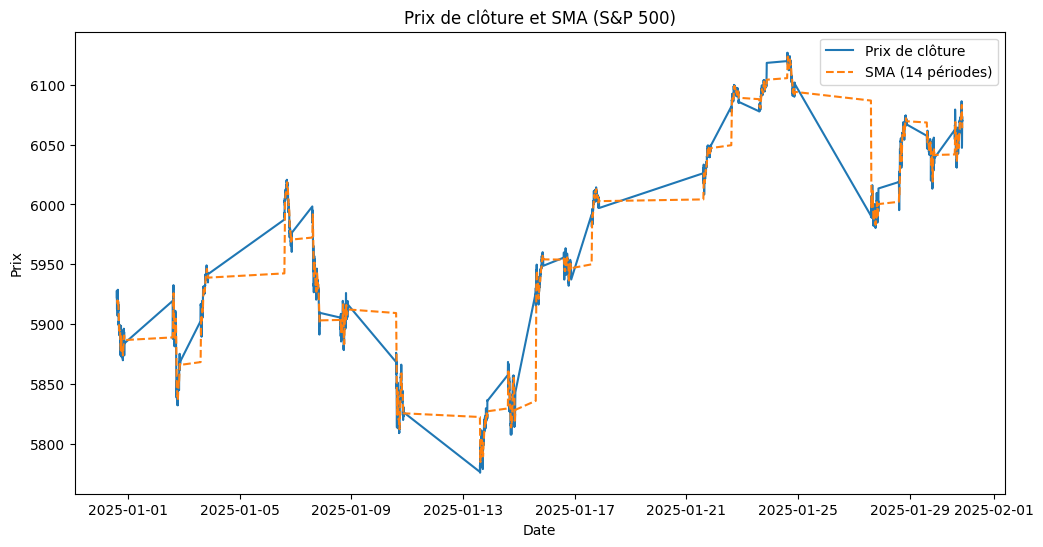

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(gspc_data['Close'], label='Prix de clôture')
plt.plot(gspc_data['SMA'], label='SMA (14 périodes)', linestyle='--')
plt.title('Prix de clôture et SMA (S&P 500)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

### 4. Nettoyage

In [10]:
# Suppression des lignes contenant des valeurs nulles
feature.dropna(inplace=True)
gspc_data.dropna(inplace=True)

In [11]:
print("\nForme après dropna :")
print("feature :", feature.shape)
print("gspc_data :", gspc_data.shape)


Forme après dropna :
feature : (3874, 9)
gspc_data : (3874, 13)


In [12]:
features = feature.drop(columns=['Close'])  # Exclure Close (la cible)
target = feature['Close']  # Garder Close comme cible

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
pca = PCA(n_components=0.9)  # Garde les composantes expliquant 90% de la variance
features_pca = pca.fit_transform(features_scaled)
# Résultat après ACP
print(f"Forme des données après ACP : {features_pca.shape}")

Forme des données après ACP : (3874, 4)


In [15]:
# Créer un nouveau DataFrame avec les composantes principales
df_pca = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

# Ajouter la cible (Close) pour créer le jeu de données final
df_final = pd.concat([df_pca, target.reset_index(drop=True)], axis=1)

In [16]:
df_final

,PC1,PC2,PC3,PC4,Close
0,1.390185,-0.260900,-1.849993,1.735973,5922.209961
1,1.307017,-0.567752,-1.842557,1.710208,5925.850098
2,1.295842,-0.606282,-0.656399,0.660852,5926.430176
3,1.226576,-0.836205,-0.692805,0.657097,5928.819824
4,1.412708,-0.154759,-0.661910,0.842038,5919.759766
...,...,...,...,...,...
3869,-1.884505,1.948903,2.746614,0.728836,6062.990234
3870,-1.943006,1.760725,2.667212,0.893181,6064.419922
3871,-2.045793,1.055208,2.701319,1.291861,6073.459961
3872,-1.934398,1.168511,2.427115,1.404716,6069.350098


### 5. Sauvegarder les données en local

In [17]:
os.makedirs("data", exist_ok=True)

In [18]:
output_filename = f"{TICKER}_{INTERVAL}_{PERIOD}.csv"
output_path = os.path.join("data", output_filename)

In [19]:
df_final.to_csv(output_path, index=False)